# Housing Data Cleaning
## 90-803 Machine Learning Foundations with Python (Spring 2024)
### Team 17: Yoko, Tessa, Hannah

In [337]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Housing Data

The first file downloaded contains "bottom tier" housing values.

## "Bottom Tier" House Values

In [338]:
# Read data and display it
bottom_tier = pd.read_csv('bottom_tier.csv')
bottom_tier.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,120563.29,...,578509.76,580476.11,585072.89,592416.77,601279.46,610308.81,617991.47,624378.00,629015.16,629399.17
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,69971.82,...,163745.94,164734.17,165692.84,166831.15,168315.38,169777.48,170958.85,171669.84,172071.54,172165.87
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,61348.08,...,195101.24,195460.75,196103.37,196682.24,197248.66,197474.82,197599.06,197548.11,197625.16,198048.80
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,80020.54,...,333735.75,334227.85,335490.49,337442.84,339900.38,342191.33,344224.21,345825.79,346831.60,347325.69
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,127922.59,...,604123.73,609236.96,616191.04,624265.53,632797.69,640792.40,647475.63,652398.99,655404.29,657596.79


In [339]:
# Melt the data so that the dates are in rows
cols = bottom_tier.columns.to_list()
rest_of_cols = cols[9:]
bottom_tier_melted = pd.melt(bottom_tier, id_vars=cols[:9], 
                          var_name='Date', value_name='Average Home Value Estimate')
bottom_tier_melted.rename(columns={'Average Home Value Estimate': 'Bottom-Tier Average Home Value Estimate'}, inplace=True)
bottom_tier_melted['Date'] = pd.to_datetime(bottom_tier_melted['Date'], format='%Y-%m-%d')
bottom_tier_melted['Year'] = bottom_tier_melted['Date'].dt.year
bottom_tier_melted['Month'] = bottom_tier_melted['Date'].dt.month
bottom_tier_melted.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Date,Bottom-Tier Average Home Value Estimate,Year,Month
515716,89,1748,Lee County,county,VA,VA,NaN,51,105,2014-04-30,39141.91,2014,4
549015,2102,1991,Winston County,county,MS,MS,NaN,28,159,2015-03-31,NaN,2015,3
149673,1257,2471,Nemaha County,county,KS,KS,NaN,20,131,2004-02-29,NaN,2004,2
543177,2943,2174,Jeff Davis County,county,GA,GA,NaN,13,161,2015-01-31,28294.51,2015,1
341547,1484,1933,Waseca County,county,MN,MN,NaN,27,161,2009-06-30,NaN,2009,6


In [340]:
# Let's explore the data
bottom_tier_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868734 entries, 0 to 868733
Data columns (total 13 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   RegionID                                 868734 non-null  int64         
 1   SizeRank                                 868734 non-null  int64         
 2   RegionName                               868734 non-null  object        
 3   RegionType                               868734 non-null  object        
 4   StateName                                868734 non-null  object        
 5   State                                    868734 non-null  object        
 6   Metro                                    525113 non-null  object        
 7   StateCodeFIPS                            868734 non-null  int64         
 8   MunicipalCodeFIPS                        868734 non-null  int64         
 9   Date                      

Since we already have RegionID, RegionName and the State, I don't think we need the "Metro" column anyway.
I'll drop that column and then explore the Average Home Value Estimates column.

In [341]:
# Drop repetitive 'metro'
bottom_tier_melted.drop(columns=['Metro'], inplace=True)

In [342]:
# Let's look what % of data is missing
num_missing = bottom_tier_melted[bottom_tier_melted['Bottom-Tier Average Home Value Estimate'].isna()].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", bottom_tier_melted.shape[0])
print("Percent missing: ", (num_missing/bottom_tier_melted.shape[0])*100)

# missing values:  271635
Out of:  868734
Percent missing:  31.267913998991638


Text(0.5, 1.0, 'Histogram of value of bottom-tier home values')

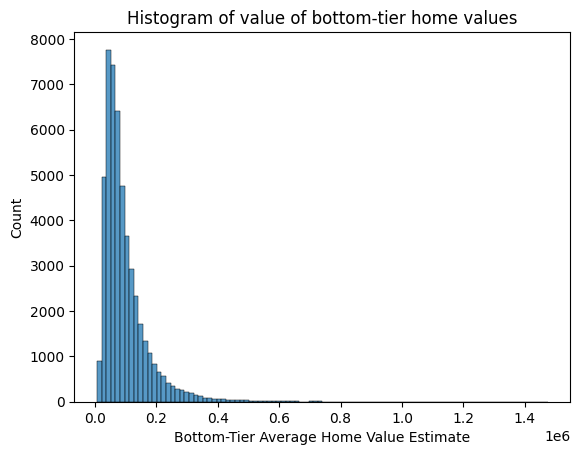

In [403]:
#sns.histplot(data=bottom_tier_melted, x='Average Home Value Estimate', binwidth=25000.00)
datasample = bottom_tier_melted.sample(50000)
#sns.scatterplot(data=datasample, x='Date', y='Average Home Value Estimate')
sns.histplot(data=datasample, x='Bottom-Tier Average Home Value Estimate', binwidth=15000.00).set_title("Histogram of value of bottom-tier home values")

Text(0.5, 1.0, 'Value of bottom-tier home values over time')

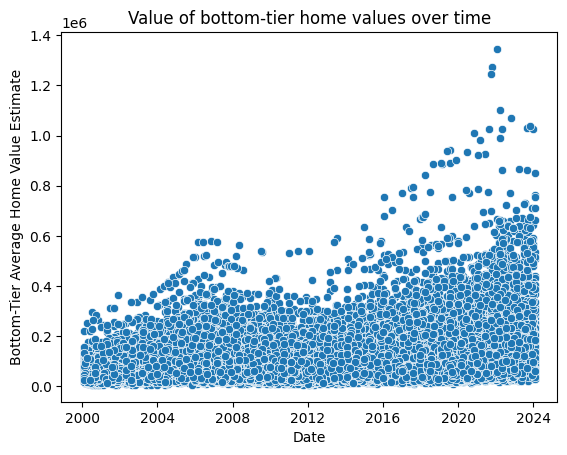

In [404]:
sns.scatterplot(data=bottom_tier_melted.sample(50000), x='Date', y='Bottom-Tier Average Home Value Estimate').set_title("Value of bottom-tier home values over time")

In [345]:
pd.options.display.float_format = '{:.2f}'.format
bottom_tier_melted.describe()

,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,Bottom-Tier Average Home Value Estimate,Year,Month
count,868734.00,868734.00,868734.00,868734.00,597099.00,868734.00,868734.00
mean,1904.44,1554.79,30.24,103.19,96888.43,2011.54,6.48
std,12745.44,912.88,15.06,107.46,76872.95,6.95,3.46
min,66.00,0.00,1.00,1.00,6028.60,2000.00,1.00
25%,870.00,760.00,18.00,35.00,49685.76,2006.00,3.00
50%,1667.50,1549.50,29.00,79.00,75169.08,2012.00,6.00
75%,2480.00,2337.00,45.00,133.00,118335.69,2018.00,9.00
max,698720.00,3212.00,56.00,840.00,1547936.51,2024.00,12.00


Given that this is time series information, I think any form of filling in the missing values via imputation, exptrapolation or interpolation would threaten the validity of any ML model. I'm going to drop all NaNs because imputing is not valid here.

In [346]:
bottom_tier_melted.dropna(inplace=True)

## "Top Tier" House Values
The next file is about "top tier" house values in different places over time.

In [401]:
# Read the data
top_tier = pd.read_csv('top_tier.csv')
top_tier.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,389752.01,...,1339166.69,1339864.26,1349494.08,1367128.36,1390244.67,1413416.01,1431880.01,1444286.53,1450876.82,1446084.76
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,299183.84,...,468886.52,470922.08,473506.96,476084.61,478598.89,480078.12,480988.12,481244.92,481103.64,480970.13
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,215869.03,...,444863.58,445672.18,447263.94,448715.79,450170.08,451024.43,451333.98,450998.09,450657.28,451043.82
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,248448.88,...,686011.88,688457.21,692428.50,697234.55,701981.10,706180.69,710209.50,713575.03,715361.02,715544.90
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,380822.96,...,1360175.96,1369771.32,1384815.02,1402608.79,1421437.41,1439901.35,1455305.47,1465239.47,1468839.58,1470213.08


In [348]:
# Melt the data so that the dates are in rows
cols = top_tier.columns.to_list()
rest_of_cols = cols[9:]
top_tier_melted = pd.melt(top_tier, id_vars=cols[:9], 
                          var_name='Date', value_name='Average Home Value Estimate')
top_tier_melted.rename(columns={'Average Home Value Estimate': 'Top-Tier Average Home Value Estimate'}, inplace=True)
top_tier_melted['Date'] = pd.to_datetime(top_tier_melted['Date'], format='%Y-%m-%d')
top_tier_melted['Year'] = top_tier_melted['Date'].dt.year
top_tier_melted['Month'] = top_tier_melted['Date'].dt.month
top_tier_melted.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Date,Top-Tier Average Home Value Estimate,Year,Month
487739,1459,1455,Vernon County,county,WI,WI,NaN,55,123,2013-03-31,203189.90,2013,3
779627,1524,904,Autauga County,county,AL,AL,"Montgomery, AL",1,1,2021-02-28,294796.04,2021,2
199827,1878,2925,Lincoln County,county,NV,NV,NaN,32,17,2005-05-31,NaN,2005,5
482751,1420,2665,Taylor County,county,GA,GA,NaN,13,269,2013-01-31,159227.77,2013,1
536970,1462,1438,Wabash County,county,IN,IN,"Wabash, IN",18,169,2014-07-31,166340.10,2014,7


In [402]:
# Let's look at the data
top_tier_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415559 entries, 0 to 889527
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   RegionID                              415559 non-null  int64         
 1   SizeRank                              415559 non-null  int64         
 2   RegionName                            415559 non-null  object        
 3   RegionType                            415559 non-null  object        
 4   StateName                             415559 non-null  object        
 5   State                                 415559 non-null  object        
 6   Metro                                 415559 non-null  object        
 7   StateCodeFIPS                         415559 non-null  int64         
 8   MunicipalCodeFIPS                     415559 non-null  int64         
 9   Date                                  415559 non-null  date

In [350]:
# To get a sense of order of magnitude, let's look at the percent missing
num_missing = top_tier_melted[top_tier_melted['Top-Tier Average Home Value Estimate'].isna()].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", top_tier_melted.shape[0])
print("Percent missing: ", (num_missing/top_tier_melted.shape[0])*100)

# missing values:  271387
Out of:  889542
Percent missing:  30.5086212905068


Text(0.5, 1.0, 'Histogram of value of bottom-tier home values')

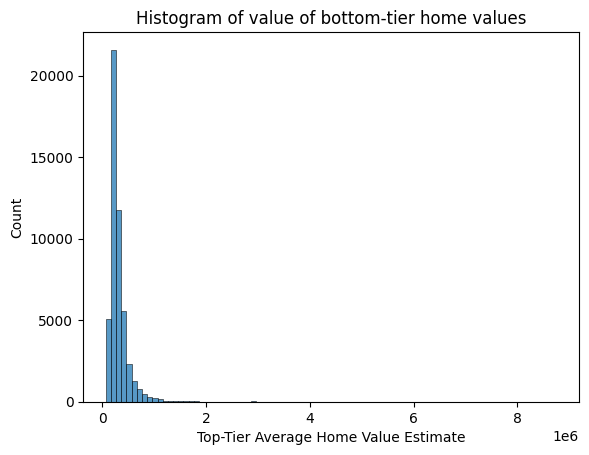

In [407]:
datasample = top_tier_melted.sample(50000)
sns.histplot(data=datasample, x='Top-Tier Average Home Value Estimate', binwidth=100000.00).set_title("Histogram of value of bottom-tier home values")

Text(0.5, 1.0, 'Top-tier home values over time')

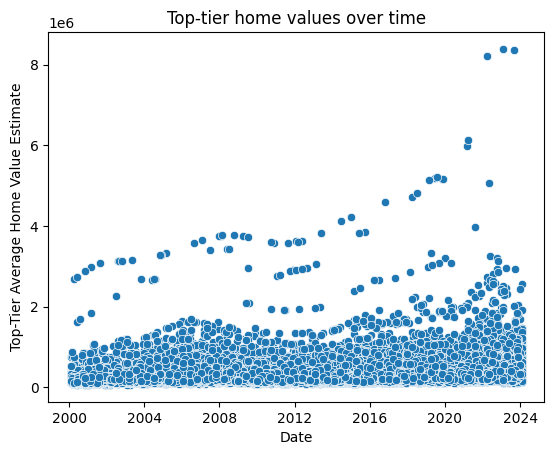

In [406]:
sns.scatterplot(data=top_tier_melted.sample(50000), x='Date', y='Top-Tier Average Home Value Estimate').set_title("Top-tier home values over time")

In [353]:
top_tier_melted.describe()

,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,Top-Tier Average Home Value Estimate,Year,Month
count,889542.00,889542.00,889542.00,889542.00,618155.00,889542.00,889542.00
mean,1898.99,1583.16,30.26,103.67,290844.20,2011.54,6.48
std,12596.21,922.74,15.08,108.00,225360.95,6.95,3.46
min,66.00,0.00,1.00,1.00,47193.77,2000.00,1.00
25%,872.00,778.00,18.00,35.00,184531.67,2006.00,3.00
50%,1669.50,1583.50,29.00,79.00,238729.58,2012.00,6.00
75%,2477.00,2383.00,45.00,133.00,328149.63,2018.00,9.00
max,698720.00,3214.00,56.00,840.00,8784955.24,2024.00,12.00


Given that this is time series information, I think any form of filling in the missing values via imputation, exptrapolation or interpolation would threaten the validity of any ML model. I'm going to drop all NaNs because imputing is not valid here.

In [354]:
top_tier_melted.dropna(inplace=True)

## Merge these dataframes

In [391]:
top_tier_melted.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Date,Top-Tier Average Home Value Estimate,Year,Month
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,2000-01-31,389752.01,2000,1
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,2000-01-31,299183.84,2000,1
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,2000-01-31,215869.03,2000,1
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,2000-01-31,248448.88,2000,1
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,2000-01-31,380822.96,2000,1
5,1286,5,Orange County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,59,2000-01-31,432407.27,2000,1
6,581,6,Kings County,county,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",36,47,2000-01-31,405157.20,2000,1
7,2964,7,Miami-Dade County,county,FL,FL,"Miami-Fort Lauderdale-Pompano Beach, FL",12,86,2000-01-31,245604.65,2000,1
8,978,8,Dallas County,county,TX,TX,"Dallas-Fort Worth-Arlington, TX",48,113,2000-01-31,204073.63,2000,1
9,2832,9,Riverside County,county,CA,CA,"Riverside-San Bernardino-Ontario, CA",6,65,2000-01-31,241029.07,2000,1


In [392]:
bottom_tier_melted.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,StateCodeFIPS,MunicipalCodeFIPS,Date,Bottom-Tier Average Home Value Estimate,Year,Month
0,3101,0,Los Angeles County,county,CA,CA,6,37,2000-01-31,120563.29,2000,1
1,139,1,Cook County,county,IL,IL,17,31,2000-01-31,69971.82,2000,1
2,1090,2,Harris County,county,TX,TX,48,201,2000-01-31,61348.08,2000,1
3,2402,3,Maricopa County,county,AZ,AZ,4,13,2000-01-31,80020.54,2000,1
4,2841,4,San Diego County,county,CA,CA,6,73,2000-01-31,127922.59,2000,1
5,1286,5,Orange County,county,CA,CA,6,59,2000-01-31,156616.68,2000,1
6,581,6,Kings County,county,NY,NY,36,47,2000-01-31,110107.27,2000,1
7,2964,7,Miami-Dade County,county,FL,FL,12,86,2000-01-31,61121.79,2000,1
8,978,8,Dallas County,county,TX,TX,48,113,2000-01-31,49695.16,2000,1
9,2832,9,Riverside County,county,CA,CA,6,65,2000-01-31,89602.13,2000,1


In [393]:
merged_data = pd.merge(left=bottom_tier_melted, right=top_tier_melted[['RegionID', 'Year', 'Month', 'Top-Tier Average Home Value Estimate']],\
                        on=['RegionID', 'Year', 'Month'])
merged_data.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,StateCodeFIPS,MunicipalCodeFIPS,Date,Bottom-Tier Average Home Value Estimate,Year,Month,Top-Tier Average Home Value Estimate
310340,2928,855,Georgetown County,county,SC,SC,45,43,2019-07-31,116847.64,2019,7,479985.35
205490,3230,1637,Staunton City,county,VA,VA,51,790,2014-07-31,97303.85,2014,7,223884.08
183307,2369,933,La Plata County,county,CO,CO,8,67,2013-06-30,181606.28,2013,6,510737.79
189785,2195,740,Cheshire County,county,NH,NH,33,5,2013-10-31,105120.94,2013,10,252174.77
309578,2698,78,Fort Bend County,county,TX,TX,48,157,2019-07-31,185300.45,2019,7,392003.83


In [394]:
new_column_order = ['Date',  'Year', 'Month','RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'StateCodeFIPS', 'MunicipalCodeFIPS',
       'Bottom-Tier Average Home Value Estimate', 'Top-Tier Average Home Value Estimate']
merged_data = merged_data[new_column_order]
merged_data.sample(5)

,Date,Year,Month,RegionID,SizeRank,RegionName,RegionType,StateName,State,StateCodeFIPS,MunicipalCodeFIPS,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate
121472,2010-03-31,2010,3,3069,112,Washington County,county,OR,OR,41,67,182117.03,382480.43
351379,2021-06-30,2021,6,2924,584,Eau Claire County,county,WI,WI,55,35,168783.84,380420.52
338343,2020-11-30,2020,11,2063,127,Volusia County,county,FL,FL,12,127,158165.49,339246.94
69456,2006-06-30,2006,6,3193,473,Spotsylvania County,county,VA,VA,51,177,202488.79,535647.42
371273,2022-05-31,2022,5,2777,637,Lancaster County,county,SC,SC,45,57,184089.84,550620.70


In [399]:
merged_data.to_csv("homevalues.csv")

This data frame only contains data on home values over time throughout the united states. Other datafiles didn't go far back enough in time and the location didn't match and would have needed to be "map-matched" to the other data sources. 

### References

1. https://pandas.pydata.org/docs/reference/api/pandas.melt.html
2. https://www.zillow.com/research/data/